In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

project = pd.read_csv('../part1/Project_data.csv')
project.head()

,Obs_No,AR #,Obs_Year,Year Live,DaysSinceLive,Reported Number of Employees,EE Year Count,ARR Year Growth,ARR Start,ARR_EndOfYear,...,Category_Account Health,RefNo_Cumulative,Connections Attendance,Training Hours,Training Students,Percent of Book,ACT Score,BI Score,Ave P_Score,Model
0,1,ABE1000,0,2011,1823,222,217,4753.0,66054,70807.0,...,1,0,0,0.0,0,1.172813,103.600918,8.841379,118.166034,1
1,2,ABE1000,1,2011,2188,222,218,5866.0,70807,76673.0,...,1,0,0,0.0,0,1.099129,103.108676,3.775498,73.553312,1
2,3,ABI1002,1,2016,240,648,381,39173.0,73369,112542.0,...,1,0,0,0.0,0,2.492619,52.468248,1.425152,17.787642,1
3,4,ACC1004,0,2010,2261,220,220,3192.0,31944,35136.0,...,1,0,0,36.0,4,1.714876,9.036163,15.128390,9.036163,1
4,5,ACC1004,1,2010,2626,220,220,3504.0,35136,38640.0,...,1,0,0,36.0,4,1.559085,30.368201,15.128390,30.368201,1


In [42]:
%matplotlib inline

In [43]:
project.columns 

Index(['Obs_No', 'AR #', 'Obs_Year', 'Year Live', 'DaysSinceLive',
       'Reported Number of Employees', 'EE Year Count', 'ARR Year Growth',
       'ARR Start', 'ARR_EndOfYear', 'BumpOut75K', 'growth_percent',
       'Product 1', 'Product 2 ', 'Product 3', 'Product 4', 'Product 5',
       'Product 6', 'Product 7', 'Product 8', 'Product 9', 'Product 10',
       'Product 11', 'Product 12', 'Product 13', 'Product 14', 'Product 15',
       'Product 16', 'Product 17', 'Product 18', 'Total Product Count',
       'Industry: Agriculture and Natural Resources', 'Industry: Construction',
       'Industry: Education', 'Industry: Finance and Insurance',
       'Industry: Healthcare', 'Industry: Manufacturing',
       'Industry: Non-Profits, Membership and Human Services',
       'Industry: Public Sector', 'Industry: Real Estate',
       'Industry: Restaurants and Hospitality', 'Industry: Retail',
       'Industry: Sports &Entertainment',
       'Industry: Technology, Professional, and Business Se

In [44]:
## only use rows that have a target value (2018 and 2017 data)
model_data = project.loc[:,"Model "]==1

In [45]:
project = project.loc[model_data, :]

In [46]:
project.shape

(1099, 57)

In [60]:
X = project.drop(["ARR Year Growth", "AR #", "Obs_Year", "ARR_EndOfYear", "growth_percent"], axis = 'columns')
y= project.loc[:,"ARR Year Growth"]


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lr.score(X_test, y_test)

-0.33068968154256617

In [ ]:
#negative value for first pass model ( is this number suppose to be btw 0 -1?)


##Second Pass below

In [64]:
feature_columns = ["ARR Start", "DaysSinceLive"]
X2 = project.loc[:, feature_columns]
y = project.loc[:,"ARR Year Growth"]

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=5)

In [66]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()

lr2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
lr2.score(X_test, y_test)

0.03441000909929404

In [70]:
list(zip(lr2.predict(X_test), y_test))

[(2432.5497473770733, 2789.0),
 (6468.550254607764, 23325.0),
 (6215.805680697275, 3675.0),
 (4995.98829807941, -5508.0),
 (654.6189427381696, 0.0),
 (5840.347895068561, 3796.0),
 (4442.752570825778, 336.0),
 (2419.0484260083203, 0.0),
 (3495.2626372880623, 2184.0),
 (-681.472745962648, -12.0),
 (3970.8106281197342, 3780.0),
 (982.3344762670167, 465.0),
 (4210.050652446635, 5280.0),
 (2668.3277909975277, 1540.0),
 (3619.0149947659957, 4341.0),
 (3313.945041071356, 1350.0),
 (5202.952230102661, 960.0),
 (1749.8486269373498, 235.0),
 (3586.8484165019227, 9180.0),
 (6553.716333524866, 5322.0),
 (5723.94235994287, 1620.0),
 (4860.942953137488, 33120.0),
 (3368.084746562491, -708.0),
 (1872.818407527, 695.0),
 (5717.373734919973, 0.0),
 (5390.425320001525, 10129.0),
 (4098.685007984844, 2504.0),
 (6826.767017645988, 32675.0),
 (7158.533757443293, 75432.0),
 (5975.049217357116, 23316.0),
 (3960.985152144767, 51055.0),
 (1627.6854559120484, 1140.0),
 (4603.655072766441, 11929.0),
 (5945.32626

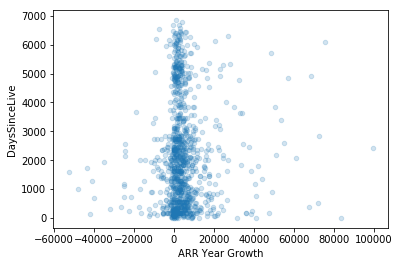

In [71]:
ax=project.plot(kind="scatter", y="DaysSinceLive", x="ARR Year Growth", alpha=.2)

In [72]:
project.describe()

,Obs_No,Obs_Year,Year Live,DaysSinceLive,Reported Number of Employees,EE Year Count,ARR Year Growth,ARR Start,ARR_EndOfYear,BumpOut75K,...,Category_Account Health,RefNo_Cumulative,Connections Attendance,Training Hours,Training Students,Percent of Book,ACT Score,BI Score,Ave P_Score,Model
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,...,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.0
mean,550.953594,0.502275,2010.669700,2157.836215,354.227480,321.020018,4471.316652,52994.086442,57465.403094,0.155596,...,1.335760,1.097361,0.303003,55.854258,10.274795,1.880357,99.045390,62.110163,90.612190,1.0
std,317.475020,0.500222,5.046875,1811.349077,405.551157,315.450341,11374.634316,15520.863425,20452.733164,0.362637,...,0.614862,2.274949,0.812079,73.770820,11.807388,7.296462,33.304957,111.766751,51.483264,0.0
min,1.000000,0.000000,1998.000000,1.000000,2.000000,4.000000,-52578.000000,2000.000000,2100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.036163,1.044294,2.626776,1.0
25%,276.500000,0.000000,2008.000000,544.000000,170.000000,169.000000,327.000000,42640.000000,43909.500000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.153907,89.870207,4.838024,56.440315,1.0
50%,551.000000,1.000000,2012.000000,1789.000000,247.000000,234.000000,2704.000000,55896.000000,58368.000000,0.000000,...,1.000000,0.000000,0.000000,30.500000,7.000000,1.420044,101.731200,15.128390,84.988370,1.0
75%,825.500000,1.000000,2015.000000,3100.000000,379.000000,351.000000,5976.000000,65475.000000,69817.000000,0.000000,...,2.000000,1.000000,0.000000,84.750000,16.000000,1.788770,113.394484,51.337913,113.833822,1.0
max,1100.000000,1.000000,2017.000000,6847.000000,5804.000000,4869.000000,99612.000000,74997.000000,168672.000000,1.000000,...,4.000000,30.000000,8.000000,694.500000,79.000000,241.015500,178.251484,455.737850,299.242056,1.0


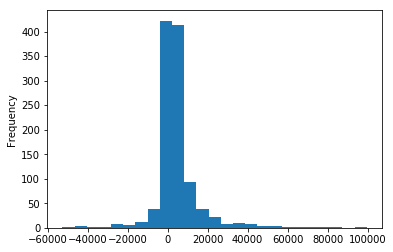

In [79]:
ax = project.loc[:,"ARR Year Growth"].plot(kind="hist", bins=25);

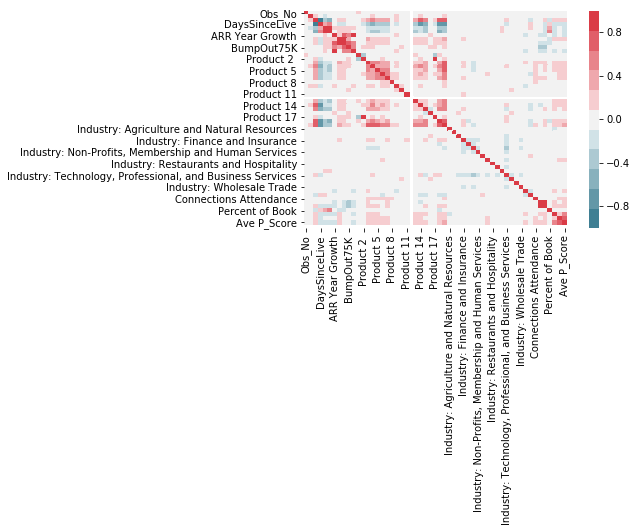

In [80]:
ax=sns.heatmap(project.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220,10, n=11))